In [12]:
import numpy as np
import pandas as pd
import pyvista as pv

In [3]:
TISA = np.loadtxt(r"J:\AusLAMP\145233_02_1 (1)\AusLAMP_EFTF1__ascii@@", skiprows = 3)

In [4]:
names = ['X'               ,'Y'              ,'Z'                ,'Resistivity'        ,'I'        ,'J'        ,'K']

In [5]:
dfTISA = pd.DataFrame(TISA, columns=names)

In [6]:
dfTISA.head()

,X,Y,Z,Resistivity,I,J,K
0,-185529.716309,7.066770e+06,0.0,103.098000,0.0,0.0,0.0
1,-185529.716309,7.074770e+06,0.0,103.328163,1.0,0.0,0.0
2,-185529.716309,7.082770e+06,0.0,103.791077,2.0,0.0,0.0
3,-185529.716309,7.090770e+06,0.0,104.506577,3.0,0.0,0.0
4,-185529.716309,7.098770e+06,0.0,105.500954,4.0,0.0,0.0


In [7]:
dfTISA.to_csv(r'J:\AusLAMP\145233_02_1 (1)\145233_02.csv', index=False)

In [8]:
dfTISA

,X,Y,Z,Resistivity,I,J,K
0,-1.855297e+05,7.066770e+06,0.0,103.098000,0.0,0.0,0.0
1,-1.855297e+05,7.074770e+06,0.0,103.328163,1.0,0.0,0.0
2,-1.855297e+05,7.082770e+06,0.0,103.791077,2.0,0.0,0.0
3,-1.855297e+05,7.090770e+06,0.0,104.506577,3.0,0.0,0.0
4,-1.855297e+05,7.098770e+06,0.0,105.500954,4.0,0.0,0.0
...,...,...,...,...,...,...,...
2570395,1.246470e+06,8.370770e+06,-307940.0,-99999.000000,163.0,179.0,84.0
2570396,1.246470e+06,8.378770e+06,-307940.0,-99999.000000,164.0,179.0,84.0
2570397,1.246470e+06,8.386770e+06,-307940.0,-99999.000000,165.0,179.0,84.0
2570398,1.246470e+06,8.394770e+06,-307940.0,-99999.000000,166.0,179.0,84.0


In [9]:
dfTISA['X'].unique().size

180

In [10]:
dfTISA['X'].unique()

array([-185529.71630859, -177529.71606445, -169529.71582031,
       -161529.71679688, -153529.71679688, -145529.71484375,
       -137529.71484375, -129529.71484375, -121529.71484375,
       -113529.71875   , -105529.71875   ,  -97529.71875   ,
        -89529.71875   ,  -81529.71875   ,  -73529.71875   ,
        -65689.71875   ,  -57529.71875   ,  -49529.71875   ,
        -41529.71875   ,  -33529.71875   ,  -25529.71875   ,
        -17529.71875   ,   -9529.71875   ,   -1529.71875   ,
          6470.28125   ,   14470.28125   ,   22470.28125   ,
         30310.28125   ,   38310.28125   ,   46470.28125   ,
         54470.28125   ,   62470.28125   ,   70470.28125   ,
         78470.28125   ,   86470.28125   ,   94630.28125   ,
        102470.28125   ,  110470.28125   ,  118470.28125   ,
        126470.28125   ,  134470.28125   ,  142470.28125   ,
        150470.28125   ,  158470.28125   ,  166470.28125   ,
        174470.28125   ,  182470.28125   ,  190470.28125   ,
        198470.28125   ,

In [14]:
df = dfTISA.sort_values(['Z', 'Y', 'X'], ascending=[True, True, True])

In [18]:
np.asarray(df[['X','Y','Z']]).shape

(2570400, 3)

In [20]:
grid = pv.RectilinearGrid( np.asarray(df['X']),np.asarray(df['Y']),np.asarray(df['Z']))
grid

RectilinearGrid,Information
N Cells,2511012
N Points,2570400
X Bounds,"-1.855e+05, 1.246e+06"
Y Bounds,"7.067e+06, 8.403e+06"
Z Bounds,"-3.079e+05, 0.000e+00"
Dimensions,"180, 168, 85"
N Arrays,0


<ipython-input-25-cac7825f6ca0>:2: RuntimeWarning: invalid value encountered in log
  grid['logres'] = np.log(grid['resistivity'])


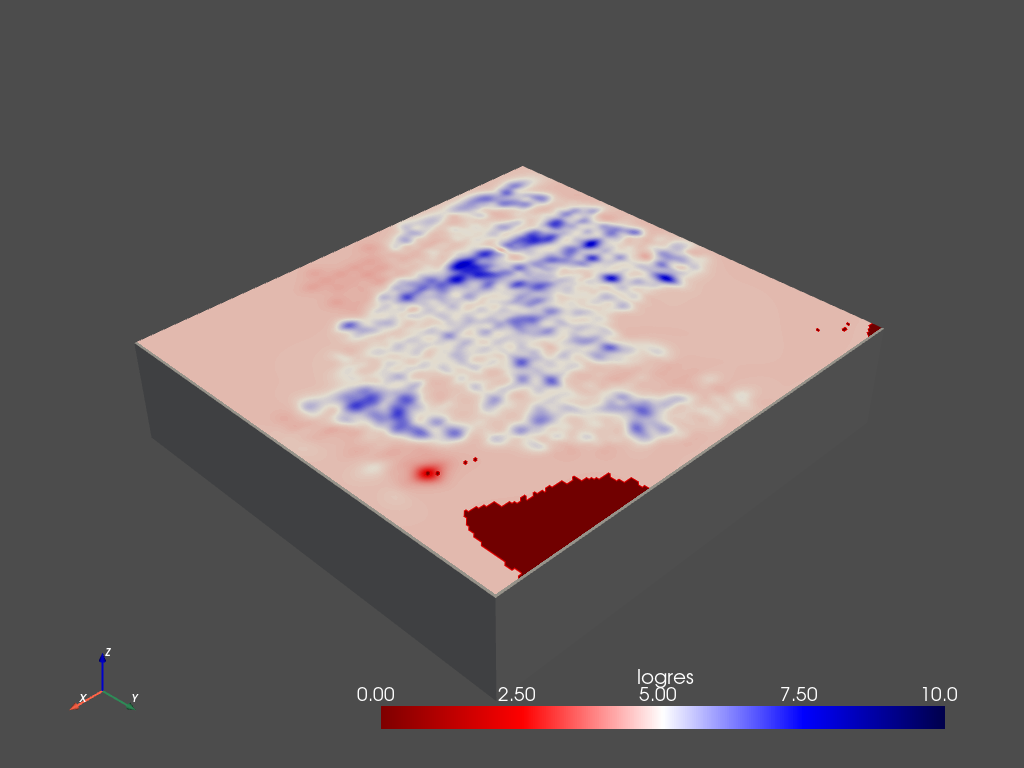

[(2741673.140795234, 9945972.876390938, 2057232.873949531),
 (530470.2668457031, 7734770.002441406, -153970.0),
 (0.0, 0.0, 1.0)]

In [25]:
grid['resistivity'] = df['Resistivity']
grid['logres'] = np.log(grid['resistivity'])
grid.plot(scalars='logres', clim=(0,10),cmap='seismic_r')

In [26]:
grid.save(r'J:/AusLAMP/145233_02_1 (1)/AusLAMP_TISA_NEW_CORRECT.vtr')